Bài toán biên:
\begin{equation}
\left[p(x)u'(x)\right]' - q(x)u(x) = -f(x) \quad  x \in [a, b]
\end{equation}
Điều kiện biên loại 1:
\begin{align*}
& u(a) = \alpha,\\
& u(b) = \beta
\end{align*}
Điều kiện biên loại 2:
\begin{align*}
& p(a)u'(a) = -\mu_1,\\
& p(b)u'(b) = -\mu_2
\end{align*}
Điều kiện biên loại 3:
\begin{align*}
& p(a)u'(a) - \sigma_1 u(a) = -\mu_1,\\
& p(b)u'(b) - \sigma_2 u(b) = -\mu_2
\end{align*}


In [116]:
import numpy as np
import math
import matplotlib.pyplot as plt

Input: p(x), q(x), f(x), khoảng a[a, b], điều kiện biên, bước lưới h

In [117]:
def p(x):
    return 1 + x*x
def q(x):
    return 4*x**3 - 6*x**2 + 2.25*x
def f(x):
    return -8*math.exp(-x**2)*(1.25*x**2 - 2.75*x - 2)


[a, b] = [0, 3]
h = 0.1

# Điều kiện biên
# Biến d thể hiện điều kiện biên có đạo hàm hay không, d = 1 là có, d = 0 là không
da = 1 
sigma_1 = 0 # điều kiện biên loại 1 thì sigma_1 = 1 và da = 0
mu_1 = -150*p(a)

db = 1
sigma_2 = 0
mu_2 = -21.9787667*p(b)


Số xấp xỉ đầu và cuối muốn in ra

In [118]:
k = 3

In [119]:
def P(i):
    return p(a + i*h)
def Q(i):
    return q(a + i*h)
def F(i):
    return f(a + i*h)

In [120]:
n = int((b-a)/h)
print('n = ', n)
M = np.eye(n+1)

M[0][0] = -(da*(P(1/2) + h*h/2*Q(0)) + sigma_1*h)
M[0][1] = da*P(1/2)

M[n][n] = -(da*(P(n-1/2) + h*h/2*Q(n)) - sigma_2*h)
M[n][n-1] = da*P(n-1/2)

for i in range(1,n):
    M[i][i-1] = P(i-1/2)
    M[i][i+1] = P(i+1/2)
    M[i][i] = -(M[i][i-1] + M[i][i+1] + h*h*Q(i))

V = np.zeros(n+1)
V[0] = -h*mu_1 - h*h/2*F(0)
V[n] = h*mu_2 - h*h/2*F(n)
for i in range(1, n):
    V[i] = -h*h*F(i)


n =  30


In [121]:
ans = np.dot(np.linalg.inv(M), V)
X = np.arange(a, b+h, h)

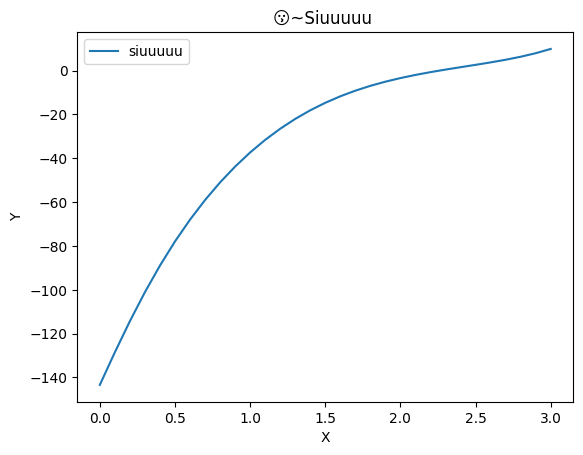

y[ 0 ] =  -143.38670286803134
y[ 1 ] =  -128.50390985057496
y[ 2 ] =  -114.29987134451734
y[ 28 ] =  6.333819272218284
y[ 29 ] =  7.946340660675556
y[ 30 ] =  9.901624686951894


In [122]:
plt.plot(X, ans, label = 'siuuuuu') # Vẽ y_1 theo t
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()

for i in range(k):
    print("y[", i, "] = ", ans[i])
for i in range(k, 0, -1):
    print("y[", n-i+1, "] = ", ans[n - i+1])